<a href="https://colab.research.google.com/github/dnz-s/Turkish-Sentiment-Analysis-of-Tweets-First_Attempts/blob/main/Text_Mining_and_Sentiment_Analysis_with_NLTK_and_pandas_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter V2 Full Archive Search
This document shows how to use Tweepy to conduct a full archive search using v2 of the Twitter API.

Prep work
In order to use this code, you will need to have a developer account on Twitter, with access to the Academic Research product track. Information about who is eligible and how to apply is here.

Once you have an account, you will need to create a new app at https://developer.twitter.com/en/portal/dashboard and generate a "bearer token" from the app. Copy the bearer token to your clipboard and paste it into a new file in the same directory as this file, called twitter_authentication.py. The entire contents of the file should look like this:

bearer_token = "YOUR BEARER TOKEN HERE"
Note that you should never share this token with anyone else. If, for example, you are saving your work in a Git repository, make sure that you add the twitter_authentication.py file to your .gitignore.

If anyone gets this token, they will have access to your Twitter account and you will need to revoke the token (from the same interface where you created it).

If you've created the file successfully, then the following two blocks of code should work.

In [1]:
pip install twitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import twitter

In [3]:
import tweepy
import time
import pandas as pd

In [4]:
file_name = 'keys.py'

In [ ]:
%%writefile {file_name}

consumer_key="insert your API key"
consumer_secret="insert your API secret"
access_token="insert your access token"
access_token_secret="insert your access token secret"
bearer_token="insert your bearer token"

In [6]:
from keys import *

In [7]:
import requests

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [9]:
# Define query
query = 'from:BarackObama -is:retweet'

# get max. 100 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)



In [10]:
import pandas as pd

# Save data as dictionary
tweets_dict = tweets.json() 

# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 

# Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 

In [11]:
df

,edit_history_tweet_ids,text,created_at,author_id,id
0,[1607411252409556993],Michelle and I send our best wishes to familie...,2022-12-26T16:21:21.000Z,813286,1607411252409556993
1,[1607022409160458240],"Merry Christmas, everybody! One of the best pa...",2022-12-25T14:36:14.000Z,813286,1607022409160458240
2,[1606432044602605568],I always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,813286,1606432044602605568
3,[1606356531385143297],I saw some great movies this year – here are s...,2022-12-23T18:30:16.000Z,813286,1606356531385143297
4,[1606303906211979269],I always look forward to sharing my lists of f...,2022-12-23T15:01:09.000Z,813286,1606303906211979269
5,[1605665894155186176],"I grew up watching Franco Harris, and had the ...",2022-12-21T20:45:55.000Z,813286,1605665894155186176


In [12]:
# save df
df.to_csv("tweets-obama.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  6 non-null      object
 1   text                    6 non-null      object
 2   created_at              6 non-null      object
 3   author_id               6 non-null      object
 4   id                      6 non-null      object
dtypes: object(5)
memory usage: 368.0+ bytes


In [14]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,edit_history_tweet_ids,text,created_at,author_id,id
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,813286,1607411252409556993
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,813286,1607022409160458240
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,813286,1606432044602605568


In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
regexp = RegexpTokenizer('\w+')

In [17]:
df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,edit_history_tweet_ids,text,created_at,author_id,id,text_token
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,813286,1607411252409556993,"[michelle, and, i, send, our, best, wishes, to..."
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,813286,1607022409160458240,"[merry, christmas, everybody, one, of, the, be..."
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,813286,1606432044602605568,"[i, always, enjoy, sharing, my, end, of, year,..."


In [19]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [21]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,edit_history_tweet_ids,text,created_at,author_id,id,text_token
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,813286,1607411252409556993,"[michelle, send, best, wishes, families, celeb..."
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,813286,1607022409160458240,"[merry, christmas, everybody, one, best, parts..."
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,813286,1606432044602605568,"[always, enjoy, sharing, end, year, music, pla..."


In [22]:
#We first change the format of text_token to strings and keep only words which are longer than 2 letters
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [23]:
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,michelle and i send our best wishes to familie...,"[michelle, send, best, wishes, families, celeb...",michelle send best wishes families celebrating...
1,"merry christmas, everybody! one of the best pa...","[merry, christmas, everybody, one, best, parts...",merry christmas everybody one best parts holid...
2,i always enjoy sharing my end of year music pl...,"[always, enjoy, sharing, end, year, music, pla...",always enjoy sharing end year music playlist y...
3,i saw some great movies this year – here are s...,"[saw, great, movies, year, favorites, miss, co...",saw great movies year favorites miss vsgemc8cn8
4,i always look forward to sharing my lists of f...,"[always, look, forward, sharing, lists, favori...",always look forward sharing lists favorite boo...


In [24]:
#Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [28]:
#Create a frequency distribution which records the number of times each word has occurred:

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'year': 4, 'books': 3, 'best': 2, 'kwanzaa': 2, 'holiday': 2, 'season': 2, 'hope': 2, 'christmas': 2, 'getting': 2, 'always': 2, ...})

In [30]:
#Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).

#Since our dataset is really small, we don’t filter out any words and set the value to greater or equal to 1 (otherwise there are not many words left in this particular dataset)


df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [31]:
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,michelle and i send our best wishes to familie...,"[michelle, send, best, wishes, families, celeb...",michelle send best wishes families celebrating...,michelle send best wishes families celebrating...
1,"merry christmas, everybody! one of the best pa...","[merry, christmas, everybody, one, best, parts...",merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...
2,i always enjoy sharing my end of year music pl...,"[always, enjoy, sharing, end, year, music, pla...",always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...
3,i saw some great movies this year – here are s...,"[saw, great, movies, year, favorites, miss, co...",saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8
4,i always look forward to sharing my lists of f...,"[always, look, forward, sharing, lists, favori...",always look forward sharing lists favorite boo...,always look forward sharing lists favorite boo...


#Lemmatization


Next, we perfom lemmatization.

In [32]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [33]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [34]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [35]:
# show level count
df.is_equal.value_counts()

True    6
Name: is_equal, dtype: int64

In [36]:
df

,edit_history_tweet_ids,text,created_at,author_id,id,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,813286,1607411252409556993,"[michelle, send, best, wishes, families, celeb...",michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,True
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,813286,1607022409160458240,"[merry, christmas, everybody, one, best, parts...",merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,True
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,813286,1606432044602605568,"[always, enjoy, sharing, end, year, music, pla...",always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,True
3,[1606356531385143297],i saw some great movies this year – here are s...,2022-12-23T18:30:16.000Z,813286,1606356531385143297,"[saw, great, movies, year, favorites, miss, co...",saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,True
4,[1606303906211979269],i always look forward to sharing my lists of f...,2022-12-23T15:01:09.000Z,813286,1606303906211979269,"[always, look, forward, sharing, lists, favori...",always look forward sharing lists favorite boo...,always look forward sharing lists favorite boo...,always look forward sharing lists favorite boo...,True
5,[1605665894155186176],"i grew up watching franco harris, and had the ...",2022-12-21T20:45:55.000Z,813286,1605665894155186176,"[grew, watching, franco, harris, honor, gettin...",grew watching franco harris honor getting know...,grew watching franco harris honor getting know...,grew watching franco harris honor getting know...,True


#Word cloud

In [39]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import wordcloud

In [41]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

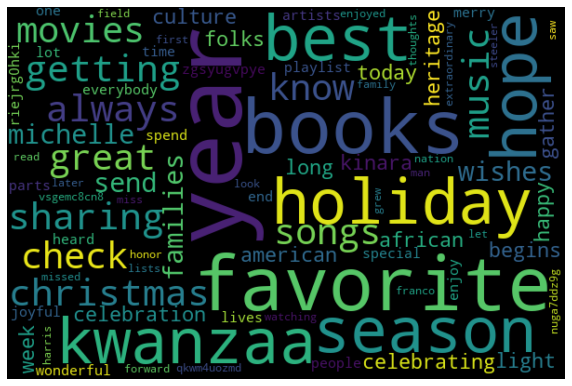

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

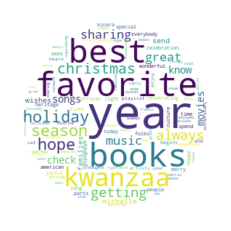

In [43]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");


Frequency distributions

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [46]:
fd.most_common(3)

[('year', 4), ('books', 3), ('best', 2)]

In [47]:
fd.tabulate(3)

 year books  best 
    4     3     2 


In [48]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

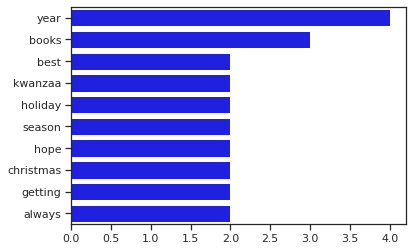

In [49]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue')

#Sentiment analysis
VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True


Sentiment Intensity Analyzer

Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#Polarity scores


Use the polarity_scores method:

In [52]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,edit_history_tweet_ids,text,created_at,author_id,id,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
3,[1606356531385143297],i saw some great movies this year – here are s...,2022-12-23T18:30:16.000Z,813286,1606356531385143297,"[saw, great, movies, year, favorites, miss, co...",saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,True,"{'neg': 0.128, 'neu': 0.32, 'pos': 0.552, 'com..."
4,[1606303906211979269],i always look forward to sharing my lists of f...,2022-12-23T15:01:09.000Z,813286,1606303906211979269,"[always, look, forward, sharing, lists, favori...",always look forward sharing lists favorite boo...,always look forward sharing lists favorite boo...,always look forward sharing lists favorite boo...,True,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp..."
5,[1605665894155186176],"i grew up watching franco harris, and had the ...",2022-12-21T20:45:55.000Z,813286,1605665894155186176,"[grew, watching, franco, harris, honor, gettin...",grew watching franco harris honor getting know...,grew watching franco harris honor getting know...,grew watching franco harris honor getting know...,True,"{'neg': 0.108, 'neu': 0.735, 'pos': 0.157, 'co..."


#Transform data

In [55]:
# Change data structure
df = pd.concat(
    [df.drop(['id', 'author_id', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)


,edit_history_tweet_ids,text,created_at,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,"[michelle, send, best, wishes, families, celeb...",michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,True,0.0,0.515,0.485,0.9571
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,"[merry, christmas, everybody, one, best, parts...",merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,True,0.0,0.337,0.663,0.9738
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,"[always, enjoy, sharing, end, year, music, pla...",always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,True,0.0,0.502,0.498,0.9169


In [56]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,edit_history_tweet_ids,text,created_at,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,[1607411252409556993],michelle and i send our best wishes to familie...,2022-12-26T16:21:21.000Z,"[michelle, send, best, wishes, families, celeb...",michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,michelle send best wishes families celebrating...,True,0.000,0.515,0.485,0.9571,positive
1,[1607022409160458240],"merry christmas, everybody! one of the best pa...",2022-12-25T14:36:14.000Z,"[merry, christmas, everybody, one, best, parts...",merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,merry christmas everybody one best parts holid...,True,0.000,0.337,0.663,0.9738,positive
2,[1606432044602605568],i always enjoy sharing my end of year music pl...,2022-12-23T23:30:20.000Z,"[always, enjoy, sharing, end, year, music, pla...",always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,always enjoy sharing end year music playlist y...,True,0.000,0.502,0.498,0.9169,positive
3,[1606356531385143297],i saw some great movies this year – here are s...,2022-12-23T18:30:16.000Z,"[saw, great, movies, year, favorites, miss, co...",saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,saw great movies year favorites miss vsgemc8cn8,True,0.128,0.320,0.552,0.7430,positive


In [57]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array([list(['1605665894155186176']),
       'i grew up watching franco harris, and had the honor of getting to know him years later. he was an extraordinary man on and off the field, and will be missed. our thoughts go out to his family and all of steeler nation.',
       '2022-12-21T20:45:55.000Z',
       list(['grew', 'watching', 'franco', 'harris', 'honor', 'getting', 'know', 'years', 'later', 'extraordinary', 'man', 'field', 'missed', 'thoughts', 'go', 'family', 'steeler', 'nation']),
       'grew watching franco harris honor getting know years later extraordinary man field missed thoughts family steeler nation',
       'grew watching franco harris honor getting know years later extraordinary man field missed thoughts family steeler nation',
       'grew watching franco harris honor getting know years later extraordinary man field missed thoughts family steeler nation',
       True, 0.108, 0.735, 0.157, 0.25, 'positive'], dtype=object)

#Visualization
 

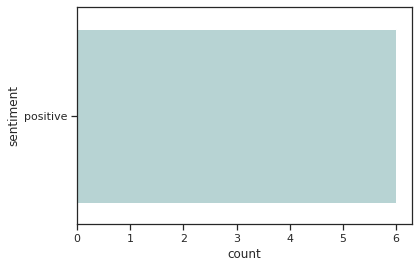

In [58]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

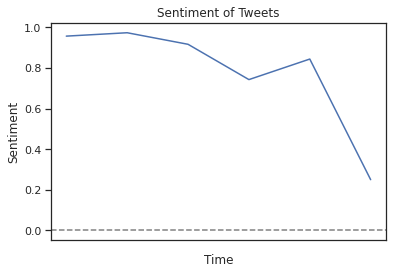

In [59]:
# Lineplot
g = sns.lineplot(x='created_at', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

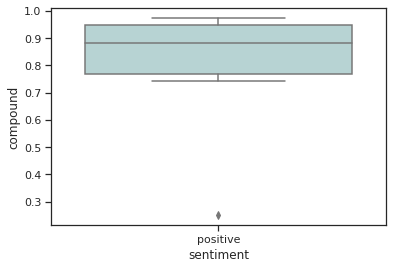

In [60]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);